# Importación de datos

In [ ]:
#Confiduración de Google Drive en Gogle Colab
from google.colab import drive
drive.mount('/content/gdrive')

#Importar librerias requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importar datos trusted los cuales ya contienen el texto extraido de los pdfs
df = pd.read_csv('/content/gdrive/MyDrive/Maestria/10k_predictor/data/trusted/TrustedDataset.csv')
df.head()

Mounted at /content/gdrive


,id,ticker,name,eva,eva_spd,mkt_cap,performance,text
0,1,AAPL,APPLE INC,80829.151310,48.159316,2.643060e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
1,2,MSFT,MICROSOFT CORP,36013.162230,13.581724,2.137120e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISS...
2,3,GOOG,ALPHABET INC-CL C,26391.742740,9.339334,1.348930e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
3,4,AMZN,AMAZON.COM INC,-8289.172578,-2.674548,1.063770e+12,0,Table of Contents UNITED STATES SECURITIES AND...
4,5,BRK/B,BERKSHIRE HATHAWAY INC-CL B,-85871.047610,-12.529865,7.104520e+11,0,UNITED STATES SECURITIES AND EXCHANGE COMMIS...


In [ ]:
#Crear la variable de interes la cual es una serie de el texto extraido de cada pdf
texts = df['text']
texts

0      UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
1       UNITED STATES SECURITIES AND EXCHANGE COMMISS...
2      UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
3      Table of Contents UNITED STATES SECURITIES AND...
4        UNITED STATES SECURITIES AND EXCHANGE COMMIS...
                             ...                        
491    30/5/23 15:57 https://www .sec.gov/Archives/ed...
492    30/5/23 15:56 nwl-20221231 https://www .sec.go...
493    30/5/23 15:55 zions-20221231 https://www .sec....
494    30/5/23 15:54 UNITED ST ATES https://www .sec....
495    30/5/23 15:53 lnc-20221231x10k https://www .se...
Name: text, Length: 496, dtype: object

# Tokenización

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Tokenizar el texto usando el idioma inglés
    tokens = nltk.word_tokenize(text, language="english")
    # Eliminar las palabras vacías, los espacios y las url
    stop_words = set(stopwords.words("english"))
    tokens = [token.strip() for token in tokens if token.isalpha() and token not in stop_words and not re.match(r"https?://\S+", token)]
    # Eliminar los guiones y las palabras muy cortas o muy largas
    tokens = [token.replace("-", "") for token in tokens if 2 < len(token) < 18]
    
    # Eliminar los nombres de los meses uno por uno
    tokens = [token for token in tokens if token.lower() != "january"]
    tokens = [token for token in tokens if token.lower() != "february"]
    tokens = [token for token in tokens if token.lower() != "march"]
    tokens = [token for token in tokens if token.lower() != "april"]
    tokens = [token for token in tokens if token.lower() != "may"]
    tokens = [token for token in tokens if token.lower() != "june"]
    tokens = [token for token in tokens if token.lower() != "july"]
    tokens = [token for token in tokens if token.lower() != "august"]
    tokens = [token for token in tokens if token.lower() != "september"]
    tokens = [token for token in tokens if token.lower() != "october"]
    tokens = [token for token in tokens if token.lower() != "november"]
    tokens = [token for token in tokens if token.lower() != "december"]
    
    # Eliminar los nombres de los dias de la semana uno por uno  
    tokens = [token for token in tokens if token.lower() != "monday"]
    tokens = [token for token in tokens if token.lower() != "tuesday"]
    tokens = [token for token in tokens if token.lower() != "wednesday"]
    tokens = [token for token in tokens if token.lower() != "thursday"]
    tokens = [token for token in tokens if token.lower() != "friday"]
    tokens = [token for token in tokens if token.lower() != "saturday"]
    tokens = [token for token in tokens if token.lower() != "sunday"]

    # Eliminar palabras varias

    tokens = [token for token in tokens if token.lower() != "https"]
    tokens = [token for token in tokens if token.lower() != "http"]
    tokens = [token for token in tokens if token.lower() != "years"]
    tokens = [token for token in tokens if token.lower() != "year"]
    tokens = [token for token in tokens if token.lower() != "also"]
    tokens = [token for token in tokens if token.lower() != "could"]
    tokens = [token for token in tokens if token.lower() != "financial"]
    tokens = [token for token in tokens if token.lower() != "company"]
    tokens = [token for token in tokens if token.lower() != "million"]



    return tokens

# Usar la función para limpiar cada texto en la lista 'pdf_texts'
tokens = [clean_text(text) for text in texts]
cleaned_text = [" ".join(token) for token in tokens]
cleaned_text = [text[900:-3000] for text in cleaned_text]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
cleaned_text[0]

'nasdaq stock mark llc notes due nasdaq stock mark llc securities registered pursuant section act none indicate check mark registrant seasoned issuer deﬁned rule securities act yes indicate check mark registrant required ﬁle reports pursuant section section act indicate check mark whether registrant ﬁled reports required ﬁled section securities exchange act preceding months shorter period registrant required ﬁle reports subject ﬁling requirements past days yes check mark whether registrant submitted electronically every interactive data file required submitted pursuant rule regulation chapter preceding months shorter period registrant required submit ﬁles yes indicate check mark whether registrant large accelerated ﬁler accelerated ﬁler ﬁler smaller reporting emerging growth see deﬁnitions large accelerated ﬁler accelerated ﬁler smaller reporting emerging growth rule exchange act large accelerated ﬁler accelerated ﬁler ﬁler smaller reporting emerging growth emerging growth indicate che

# SVD

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
vectorizer = TfidfVectorizer(stop_words='english',smooth_idf=True) 
# under the hood - lowercasing,removing special chars,removing stop words
input_matrix = vectorizer.fit_transform(cleaned_text)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

tfidf_matrix = input_matrix

# Realizar la descomposición SVD
svd = TruncatedSVD(n_components=6)  # Especifica el número de tópicos que deseas obtener
svd_matrix = svd.fit_transform(tfidf_matrix)

# Obtener los tópicos
topicos = svd.components_

# Obtener las principales palabras por tópico
num_palabras = 10  # Número de principales palabras que deseas obtener por tópico

for i, topico in enumerate(topicos):
    print(f"Tópico {i+1}:")
    # Obtener los índices de las palabras más importantes en el tópico
    indices_palabras = topico.argsort()[-num_palabras:][::-1]
    # Obtener las palabras correspondientes a los índices
    palabras = [vectorizer.get_feature_names_out()[indice] for indice in indices_palabras]
    # Imprimir las palabras
    for palabra in palabras:
        print(palabra)
    print("\n")

Tópico 1:
net
income
assets
business
cash
tax
value
operations
including
statements


Tópico 2:
ﬁnancial
signiﬁcant
ﬁscal
beneﬁt
ﬁled
beneﬁts
aﬀect
eﬀective
ﬂows
eﬀect


Tópico 3:
loans
risk
credit
capital
securities
losses
reinsurance
total
investment
insurance


Tópico 4:
gas
oil
proved
natural
production
energy
crude
costs
drilling
ngls


Tópico 5:
clinical
gas
oil
patients
health
medicare
medicaid
fda
proved
care


Tópico 6:
services
revenue
reit
operating
clients
ﬁscal
stock
properties
notes
tenants




# NMF

In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_matrix = input_matrix

# Realizar la descomposición NMF con la norma de Frobenius
num_topics = 6  # Especifica el número de tópicos que deseas obtener
num_words = 10 #Especifica el numero de palabras principales
nmf_frobenius = NMF(n_components=num_topics, random_state=42, beta_loss='frobenius')
nmf_matrix_frobenius = nmf_frobenius.fit_transform(tfidf_matrix)

# Realizar la descomposición NMF con la divergencia de Kullback-Leibler
nmf_kl = NMF(n_components=num_topics, random_state=42, beta_loss='kullback-leibler', solver='mu')
nmf_matrix_kl = nmf_kl.fit_transform(tfidf_matrix)

# Obtener los tópicos para NMF con norma de Frobenius
topic_matrix_frobenius = nmf_frobenius.components_

# Obtener los tópicos para NMF con divergencia de Kullback-Leibler
topic_matrix_kl = nmf_kl.components_

# Realizar comparaciones de tópicos o realizar otras evaluaciones
# según tus necesidades


In [ ]:
for i, topic in enumerate(topic_matrix_frobenius):
    print(f"Tópico {i+1}:")
    # Obtener los índices de las palabras más importantes en el tópico
    top_word_indices = topic.argsort()[:-num_words-1:-1]
    # Obtener las palabras correspondientes a los índices
    top_words = [vectorizer.get_feature_names_out()[index] for index in top_word_indices]
    # Imprimir las palabras
    for word in top_words:
        print(word)
    print("\n")


Tópico 1:
net
tax
assets
income
business
cash
value
products
operations
statements


Tópico 2:
ﬁnancial
signiﬁcant
ﬁscal
beneﬁt
tax
ﬁled
net
assets
beneﬁts
income


Tópico 3:
risk
credit
loans
income
securities
net
value
total
losses
assets


Tópico 4:
gas
oil
proved
natural
costs
production
energy
crude
assets
operations


Tópico 5:
products
clinical
fda
patients
health
product
including
healthcare
medicare
medicaid


Tópico 6:
income
reit
operating
cash
properties
notes
stock
tenants
statements
net




In [ ]:
for i, topic in enumerate(topic_matrix_kl):
    print(f"Tópico {i+1}:")
    # Obtener los índices de las palabras más importantes en el tópico
    top_word_indices = topic.argsort()[:-num_words-1:-1]
    # Obtener las palabras correspondientes a los índices
    top_words = [vectorizer.get_feature_names_out()[index] for index in top_word_indices]
    # Imprimir las palabras
    for word in top_words:
        print(word)
    print("\n")


Tópico 1:
net
tax
assets
business
income
cash
products
value
operations
stock


Tópico 2:
ﬁnancial
signiﬁcant
beneﬁt
ﬁscal
ﬁled
beneﬁts
aﬀect
eﬀective
ﬂows
eﬀect


Tópico 3:
income
net
risk
credit
value
securities
assets
total
loans
business


Tópico 4:
gas
assets
net
income
costs
cash
operations
energy
oil
value


Tópico 5:
products
clinical
including
business
health
fda
net
certain
healthcare
patients


Tópico 6:
income
cash
operating
stock
net
statements
including
business
operations
value




# EL MEJOR ES NMF FROBENIUS

Tópico 1:


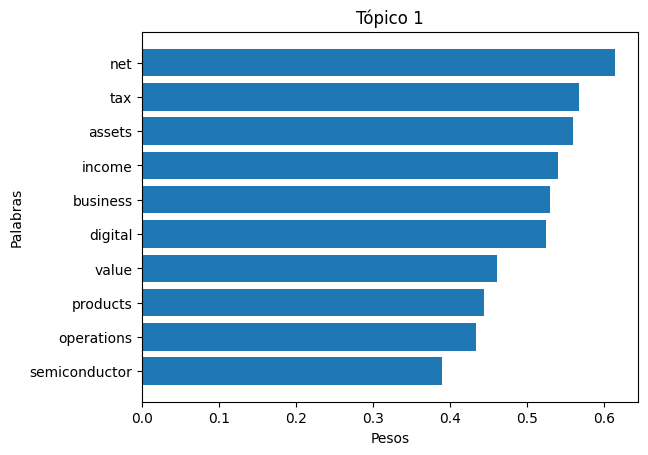



Tópico 2:


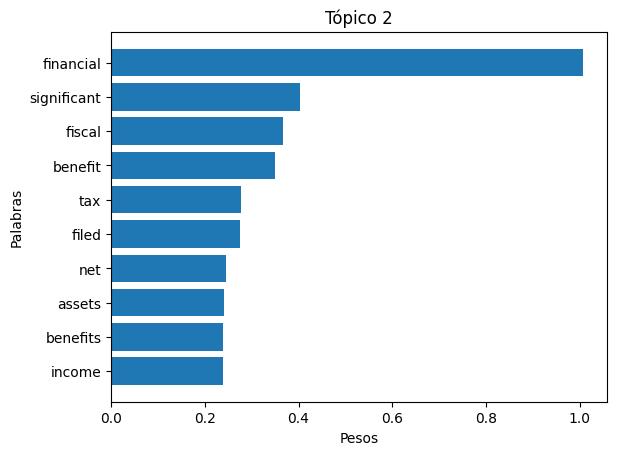



Tópico 3:


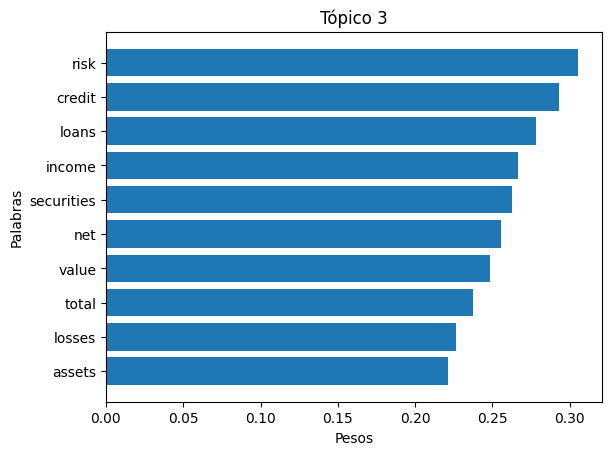



Tópico 4:


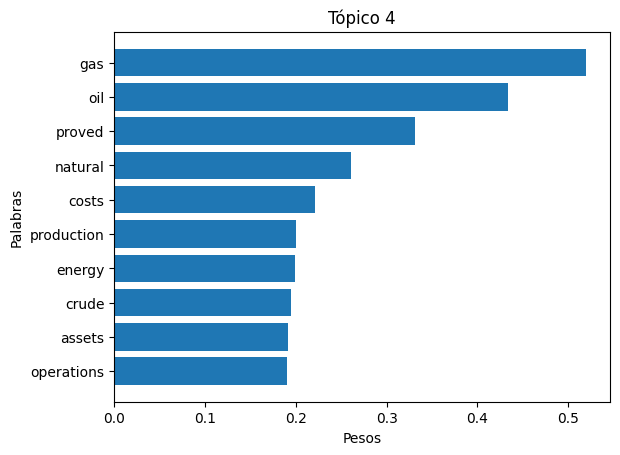



Tópico 5:


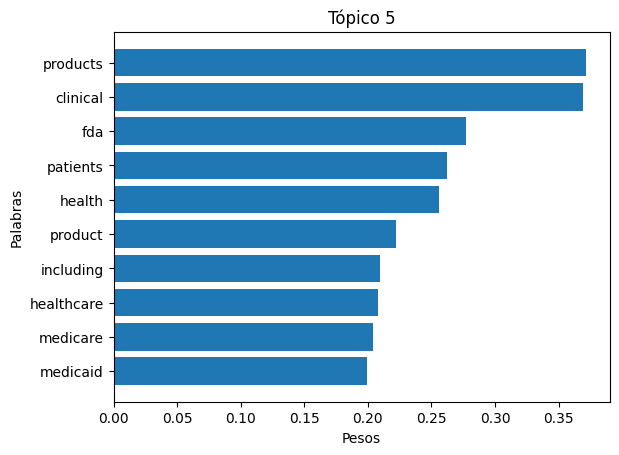



Tópico 6:


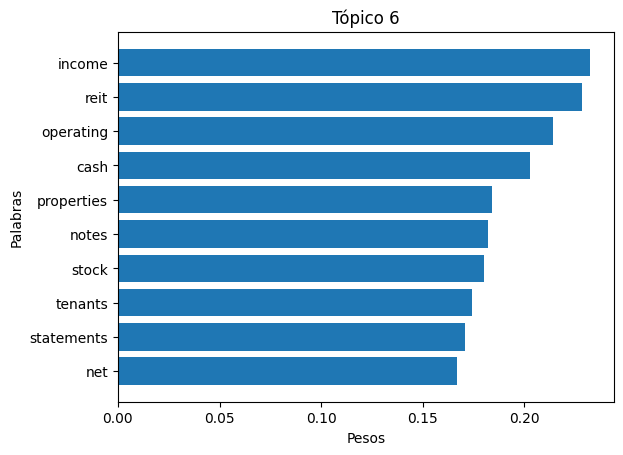

In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

tfidf_matrix = input_matrix

# Realizar la descomposición NMF con la norma de Frobenius
num_topics = 6  # Especifica el número de tópicos que deseas obtener
num_words = 10 #Especifica el numero de palabras principales
nmf_frobenius = NMF(n_components=num_topics, random_state=42, beta_loss='frobenius')
nmf_matrix_frobenius = nmf_frobenius.fit_transform(tfidf_matrix)

# Obtener los tópicos para NMF con norma de Frobenius
topic_matrix_frobenius = nmf_frobenius.components_

for i, topic in enumerate(topic_matrix_frobenius):
    print(f"Tópico {i+1}:")
    top_word_indices = topic.argsort()[:-num_words-1:-1]
    top_words = [vectorizer.get_feature_names_out()[index] for index in top_word_indices]
    top_word_weights = topic[top_word_indices]

    # Invertir los datos
    top_words = top_words[::-1]
    top_word_weights = top_word_weights[::-1]

    # Plotear las palabras y sus pesos
    fig, ax = plt.subplots()
    ax.barh(top_words, top_word_weights)
    ax.set_xlabel('Pesos')
    ax.set_ylabel('Palabras')
    ax.set_title(f'Tópico {i+1}')

    plt.show()
    print("\n")

In [ ]:
import pandas as pd


data = []
for doc_index, doc_topic_weights in enumerate(nmf_matrix_frobenius):
    row = {'Documento': doc_index}
    for topic_index, weight in enumerate(doc_topic_weights):
        row[f'Tópico {topic_index + 1}'] = weight
    data.append(row)

# Crear el DataFrame
dftopicos = pd.DataFrame(data)
dftopicos['Documento'] = dftopicos['Documento'] + 1
# Imprimir el DataFrame
dftopicos['performance'] = df['performance']
pd.set_option('display.precision', 4)
dftopicos

,Documento,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6,performance
0,1,0.0188,0.3153,0.0000,0.0000,0.0272,0.0000,1
1,2,0.0759,0.2184,0.0000,0.0000,0.0520,0.0000,1
2,3,0.0521,0.2085,0.0490,0.0000,0.0282,0.0273,1
3,4,0.1048,0.2303,0.0000,0.0000,0.0128,0.0465,0
4,5,0.0106,0.1329,0.1607,0.0755,0.0278,0.0000,0
...,...,...,...,...,...,...,...,...
491,492,0.0492,0.0000,0.0186,0.0309,0.0111,0.1151,0
492,493,0.2216,0.0012,0.0092,0.0189,0.0000,0.0170,0
493,494,0.0130,0.0000,0.3196,0.0000,0.0000,0.0244,1
494,495,0.0395,0.0193,0.0075,0.0034,0.0249,0.0928,0


In [ ]:
# Separar el DataFrame en dos nuevos DataFrames según el valor de "performance"
dftopicos_1 = dftopicos.loc[dftopicos['performance'] == 1]
dftopicos_1 = dftopicos_1.reset_index(drop=True)
dftopicos_0 = dftopicos.loc[dftopicos['performance'] == 0]
dftopicos_0 = dftopicos_0.reset_index(drop=True)
pd.set_option('display.precision', 4)
dftopicos_0

,Documento,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6,performance
0,4,0.1048,0.2303,0.0000,0.0000,0.0128,0.0465,0
1,5,0.0106,0.1329,0.1607,0.0755,0.0278,0.0000,0
2,6,0.0628,0.2168,0.0000,0.0000,0.0428,0.0000,0
3,13,0.0005,0.0000,0.5146,0.0000,0.0000,0.0000,0
4,26,0.0039,0.0000,0.5330,0.0074,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...
213,491,0.0814,0.0031,0.0123,0.0682,0.0000,0.0752,0
214,492,0.0492,0.0000,0.0186,0.0309,0.0111,0.1151,0
215,493,0.2216,0.0012,0.0092,0.0189,0.0000,0.0170,0
216,495,0.0395,0.0193,0.0075,0.0034,0.0249,0.0928,0


In [ ]:
import pandas as pd

# Calcular la media, mediana y contar ceros para df_performance_1
df_perf1_stats = dftopicos_1[['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6']].agg(['mean', 'median'])
df_perf1_zeros = (dftopicos_1[['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6']] == 0).sum()

# Crear la tabla para df_performance_1
tabla_perf1 = pd.DataFrame({
    'Tópicos': ['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6'],
    'Mean': df_perf1_stats.loc['mean'],
    'Median': df_perf1_stats.loc['median'],
    'Cuenta de ceros': df_perf1_zeros
})

# Calcular la media, mediana y contar ceros para df_performance_0
df_perf0_stats = dftopicos_0[['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6']].agg(['mean', 'median'])
df_perf0_zeros = (dftopicos_0[['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6']] == 0).sum()

# Crear la tabla para df_performance_0
tabla_perf0 = pd.DataFrame({
    'Tópicos': ['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6'],
    'Mean': df_perf0_stats.loc['mean'],
    'Median': df_perf0_stats.loc['median'],
    'Cuenta de ceros': df_perf0_zeros
})
tabla_perf1 = tabla_perf1.reset_index(drop=True)
tabla_perf0 = tabla_perf0.reset_index(drop=True)
# Mostrar las tablas

In [ ]:
print('Documentos totales Clase 1: 278')
tabla_perf1

Documentos totales Clase 1: 278


,Tópicos,Mean,Median,Cuenta de ceros
0,Tópico 1,0.103609,0.101724,31
1,Tópico 2,0.050766,0.000000,152
2,Tópico 3,0.043097,0.011446,93
3,Tópico 4,0.035419,0.003310,119
4,Tópico 5,0.037749,0.006586,111
5,Tópico 6,0.029971,0.009659,115


In [ ]:
print('Documentos totales Clase 0: 218')
tabla_perf0

Documentos totales Clase 0: 218


,Tópicos,Mean,Median,Cuenta de ceros
0,Tópico 1,0.0585,0.0425,37
1,Tópico 2,0.0393,0.0000,128
2,Tópico 3,0.0610,0.0203,46
3,Tópico 4,0.0287,0.0050,89
4,Tópico 5,0.0281,0.0013,106
5,Tópico 6,0.0671,0.0184,65


In [ ]:
# Filtrar las filas con mayor presencia en tópico 1 y performance = 1
df_topico1_perf1 = dftopicos[(dftopicos['performance'] == 1)].nlargest(50, 'Tópico 1')

# Filtrar las filas con mayor presencia en tópico 3 y performance = 0
df_topico6_perf0 = dftopicos[(dftopicos['performance'] == 0)].nlargest(50, 'Tópico 6')

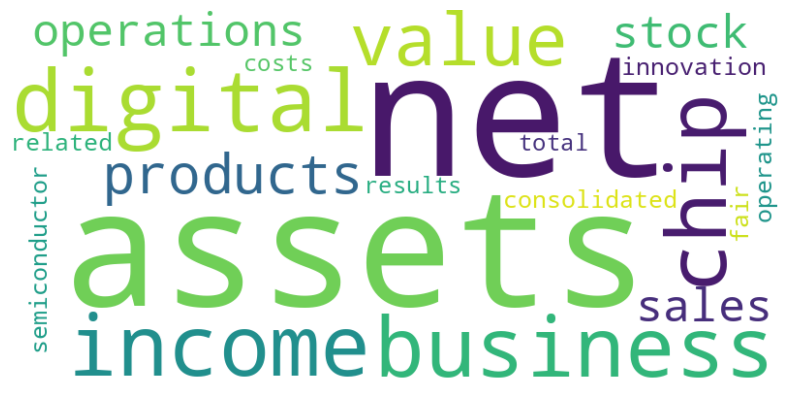

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain


# Obtener los tokens correspondientes a los 50 documentos en df_topico1_perf1
tokens_topico1_perf1 = [tokens[i] for i in df_topico1_perf1.index]

# Aplanar la lista de tokens
flattened_tokens = list(chain.from_iterable(tokens_topico1_perf1))

# Crear un diccionario con la frecuencia de cada palabra
word_freq = nltk.FreqDist(flattened_tokens)

# Obtener las 10 palabras más frecuentes
top_words = word_freq.most_common(20)

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
word_freq_dict = dict(top_words)

# Generar el Word Cloud con las palabras más importantes
wordcloud.generate_from_frequencies(word_freq_dict)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
dftopico1_1 = df.loc[df_topico1_perf1.index]
dftopico1_1.loc[272] = df.iloc[1]
dftopico1_1 = dftopico1_1.merge(dftopicos[['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6']], left_index=True, right_index=True)
dftopico1_1 = dftopico1_1[['name','Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6', 'performance']]

dftopico1_1.head(10)

,name,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6,performance
397,AVERY DENNISON CORP,0.2541,0.0000e+00,0.0288,0.0090,0.0000,0.0000,1
254,HP INC,0.2537,3.8306e-05,0.0257,0.0000,0.0253,0.0000,1
272,MICROSOFT CORP,0.2502,0.0000e+00,0.0135,0.0208,0.0563,0.0000,1
192,TE CONNECTIVITY LTD,0.2445,0.0000e+00,0.0000,0.0000,0.0000,0.0000,1
483,SEALED AIR CORP,0.2432,0.0000e+00,0.0224,0.0294,0.0000,0.0029,1
243,ROCKWELL AUTOMATION INC,0.2421,1.0780e-04,0.0170,0.0124,0.0000,0.0000,1
356,SKYWORKS SOLUTIONS INC,0.2412,0.0000e+00,0.0000,0.0000,0.0819,0.0000,1
352,WATERS CORP,0.2397,1.5952e-03,0.0000,0.0028,0.0575,0.0055,1
407,SNAP-ON INC,0.2354,0.0000e+00,0.0628,0.0045,0.0000,0.0000,1
119,COLGATE-PALMOLIVE CO,0.2353,0.0000e+00,0.0168,0.0020,0.0158,0.0000,1


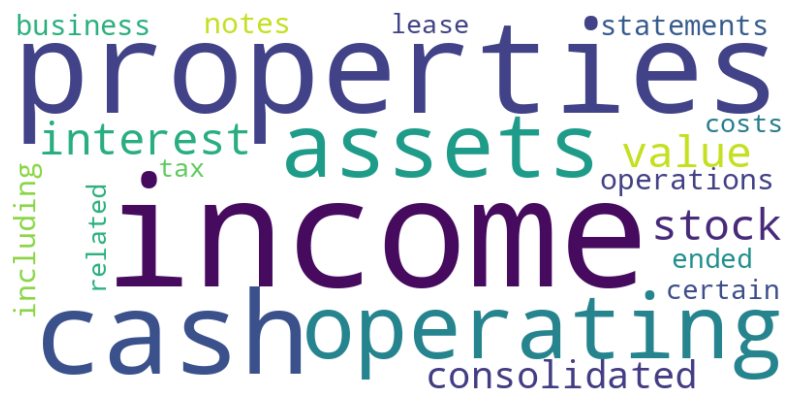

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain


# Obtener los tokens correspondientes a los 50 documentos en df_topico1_perf1
tokens_topico6_perf0 = [tokens[i] for i in df_topico6_perf0.index]

# Aplanar la lista de tokens
flattened_tokens = list(chain.from_iterable(tokens_topico6_perf0))

# Crear un diccionario con la frecuencia de cada palabra
word_freq = nltk.FreqDist(flattened_tokens)

# Obtener las 10 palabras más frecuentes
top_words = word_freq.most_common(20)

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
word_freq_dict = dict(top_words)

# Generar el Word Cloud con las palabras más importantes
wordcloud.generate_from_frequencies(word_freq_dict)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
dftopico6_0 = df.loc[df_topico6_perf0.index]
dftopico6_0 = dftopico6_0.merge(dftopicos[['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6']], left_index=True, right_index=True)
dftopico6_0 = dftopico6_0[['name','Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6', 'performance']]
dftopico6_0.head(10)

,name,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6,performance
474,FEDERAL REALTY INVS TRUST,0.0000,0.0,0.0060,0.0000,0.0000,0.5848,0
323,EXTRA SPACE STORAGE INC,0.0158,0.0,0.0491,0.0000,0.0000,0.5165,0
432,KIMCO REALTY CORP,0.0000,0.0,0.0343,0.0000,0.0000,0.4722,0
435,HEALTHPEAK PROPERTIES INC,0.0052,0.0,0.0705,0.0062,0.0170,0.4722,0
314,ALEXANDRIA REAL ESTATE EQUIT,0.0000,0.0,0.0204,0.0000,0.0364,0.4445,0
189,REALTY INCOME CORP,0.0105,0.0,0.0772,0.0000,0.0000,0.4365,0
322,INVITATION HOMES INC,0.0146,0.0,0.0764,0.0000,0.0129,0.4279,0
450,REGENCY CENTERS CORP,0.0000,0.0,0.0000,0.0000,0.0000,0.4265,0
347,VENTAS INC,0.0000,0.0,0.0500,0.0000,0.0366,0.4062,0
408,ESSEX PROPERTY TRUST INC,0.0000,0.0,0.0107,0.0000,0.0000,0.4041,0
